importing Jupyter notebook from testDataCreation.ipynb
importing Jupyter notebook from initialRankingAlgos.ipynb
[5]
[2]
True
[0.47222222 0.05555556 0.22222222 0.08333333 0.08333333 0.05555556
 0.02777778]
[(0, {'weight': 0.4722222222222222}), (1, {'weight': 0.05555555555555555}), (2, {'weight': 0.2222222222222222}), (6, {'weight': 0.027777777777777776}), (3, {'weight': 0.08333333333333333}), (4, {'weight': 0.08333333333333333}), (5, {'weight': 0.05555555555555555})]
[0.375  0.0625 0.25   0.125  0.125  0.0625 0.    ]
[0]
[1, 5]
[[0.  0.  0.  0.  0.  0.  1. ]
 [0.5 0.  0.  0.  0.  0.  0. ]
 [0.5 0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.5 0.  0.  0.  0. ]
 [0.  0.  0.5 0.  0.  0.  0. ]
 [0.  0.  0.  1.  1.  0.  0. ]
 [0.  1.  0.  0.  0.  1.  0. ]]
[0.25   0.125  0.125  0.0625 0.0625 0.125  0.25  ]
2.3590712984783533
0.5897678246195885
0.2948839123097938
0.2948839123097939
0.1474419561548972
0.1474419561548971
0.29488391230979405
0.589767824619589
[0.25   0.125  0.125  0.0625 0.0625 0.125  0.

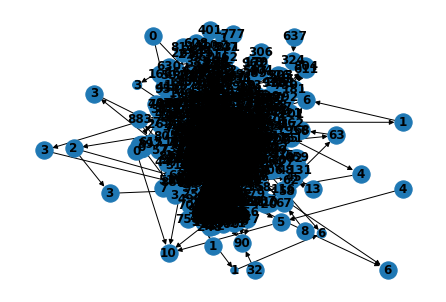

In [1]:
import numpy as np
from numpy import linalg as LA
import matplotlib as mpl
import matplotlib.pyplot as plt
import networkx as nx
import scipy
import glob
import statistics as st
from random import choices

import import_ipynb
from testDataCreation import random_finished_dag
from testDataCreation import cycleMatrix
from testDataCreation import initGraph
from testDataCreation import showWeightDG

test_data/rand_finished_DAG_N10_E10.txt
[[0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 1 0]
 [1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 1 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]]


True

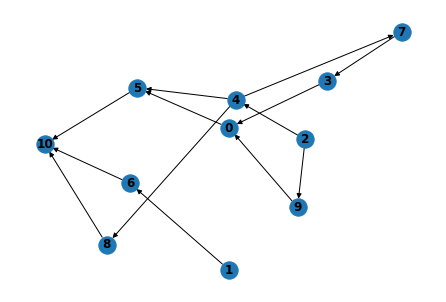

In [18]:
for file_name in glob.iglob('test_data/*N10_E10.txt', recursive=True):
    M = np.loadtxt(file_name, dtype=int)
    print(file_name)
    print(M)
    break

DG = initGraph(M)

nx.draw(DG, with_labels=True, font_weight='bold')
nx.is_directed_acyclic_graph(DG)

In [3]:
list(nx.topological_sort(DG))

[8, 6, 7, 2, 3, 0, 4, 5, 1, 9, 10]

In [19]:
def add_fixed_params_to_graph(DG):
    for node in DG.nodes:
        DG.add_node(node, execution_time=10)
        DG.add_node(node, fix_time=30)
        DG.add_node(node, fail_probability=0)
        DG.add_node(node, status='Not Started')
        DG.add_node(node, start_time='Not filled')
        DG.add_node(node, end_time='Not filled')
    DG.add_node(1, fail_probability=0.9)
    DG.add_node(4, fail_probability=0.5)
        
add_fixed_params_to_graph(DG)
print(DG.nodes.data())

[(0, {'execution_time': 10, 'fix_time': 30, 'fail_probability': 0, 'status': 'Not Started', 'start_time': 'Not filled', 'end_time': 'Not filled'}), (5, {'execution_time': 10, 'fix_time': 30, 'fail_probability': 0, 'status': 'Not Started', 'start_time': 'Not filled', 'end_time': 'Not filled'}), (1, {'execution_time': 10, 'fix_time': 30, 'fail_probability': 0.9, 'status': 'Not Started', 'start_time': 'Not filled', 'end_time': 'Not filled'}), (6, {'execution_time': 10, 'fix_time': 30, 'fail_probability': 0, 'status': 'Not Started', 'start_time': 'Not filled', 'end_time': 'Not filled'}), (2, {'execution_time': 10, 'fix_time': 30, 'fail_probability': 0, 'status': 'Not Started', 'start_time': 'Not filled', 'end_time': 'Not filled'}), (4, {'execution_time': 10, 'fix_time': 30, 'fail_probability': 0.5, 'status': 'Not Started', 'start_time': 'Not filled', 'end_time': 'Not filled'}), (9, {'execution_time': 10, 'fix_time': 30, 'fail_probability': 0, 'status': 'Not Started', 'start_time': 'Not fil

In [20]:
def simulate_execution_evol(DG, top_sort, verbose = True):
    add_fixed_params_to_graph(DG)
    time = 0
    processor = 'Empty'
    while True:
        in_progress_count = 0
        no_changes = True
        for i in top_sort:
            execution_time = DG.nodes[i]['execution_time']
            fix_time = DG.nodes[i]['fix_time']
            fail_probability = DG.nodes[i]['fail_probability']
            status = DG.nodes[i]['status']
            start_time = DG.nodes[i]['start_time']
            end_time = DG.nodes[i]['end_time']
            if ((status == 'Not Started') and (check_if_preds_are_successful(DG, i))):
                no_changes = False
                #Starting node execution
                if (processor == 'Empty'): #If resources for execution
                    processor = i
                    DG.add_node(i, start_time=time)
                    DG.add_node(i, status='In Progress')
                #Else waiting for processor to empty
            elif ((status == 'In Progress') and (start_time != 'Not filled') and (time - start_time == execution_time)):
                no_changes = False
                #Finishing node execution
                res = choices([0, 1], [fail_probability, 1-fail_probability])
                if (res[0] == 0):
                    DG.add_node(i, status='Fail')
                    if verbose: print("Node "+str(i)+" failed.")
                else:
                    DG.add_node(i, status='Success')
                DG.add_node(i, end_time=time)
                processor = 'Empty'
                if check_if_last_node(DG, i):
                    executing = False
            if verbose: print("Node: "+str(i)+", time : "+str(time)+", status: "+DG.nodes[i]['status']+
                  ", start_time: "+str(DG.nodes[i]['start_time'])+
                  ", end_time: "+str(DG.nodes[i]['end_time']))
            if (DG.nodes[i]['status'] == "In Progress"):
                in_progress_count += 1
        if ((in_progress_count == 0) and (no_changes)):
            if verbose: print("Finished process")
            break
        else:
            time += 1
            if verbose: print("FINISHED ITERATION")
            
def check_if_preds_are_successful(DG, i):
    preds = list(DG.predecessors(i))
    for j in preds:
        status = DG.nodes[j]['status']
        if (status != 'Success'):
            return False
    return True

def check_if_last_node(DG, i):
    succ = list(DG.successors(i))
    if (len(succ) == 0):
        return True
    else:
        return False

In [6]:
def count_execution_coverage(DG):
    count = 0
    for node in DG.nodes:
        status = DG.nodes[node]['status']
        if (status == 'Success'):
            count += 1
    return count

In [21]:
def getTotalPredecessors(DG, i):
    pred_set = set()
    if (len(list(DG.predecessors(i))) != 0):
        pred_set |= set(list(DG.predecessors(i)))
        for j in list(DG.predecessors(i)):
            pred_set.update(getTotalPredecessors(DG, j))
    return pred_set

def getSuccessProbability2(DG, node):
    pred_set = getTotalPredecessors(DG, node)
    res = 1-DG.nodes[node]['fail_probability']
    for pred in pred_set:
        res *= 1-DG.nodes[pred]['fail_probability']
        getSuccessProbability2(DG, pred)
    DG.add_node(node, total_success_probability=res)
    return res

def analytical_success_coverage2(DG):
    last_node = len(DG.nodes)-1
    node = last_node
    success_probability = getSuccessProbability2(DG, node)
    res = []
    print("finish")
    for node in DG.nodes():
        print(node)
        print(DG.nodes[node]['total_success_probability'])
        res.append(DG.nodes[node]['total_success_probability'])
    print(res)
    return sum(res)

analytical_success_coverage2(DG)

finish
0
0.5
5
0.5
1
0.09999999999999998
6
0.09999999999999998
2
1
4
0.5
9
1
3
0.5
7
0.5
8
0.5
10
0.04999999999999999
[0.5, 0.5, 0.09999999999999998, 0.09999999999999998, 1, 0.5, 1, 0.5, 0.5, 0.5, 0.04999999999999999]


5.25

In [22]:
simulate_execution_evol(DG, list(nx.topological_sort(DG)), False) 
print(count_execution_coverage(DG))

2


In [23]:
top_sorts = list(nx.all_topological_sorts(DG))
print("Total number of top sorts for DAG: "+str(len(top_sorts)))

Total number of top sorts for DAG: 1035


Experiment: N = 1
Starting sort number 1
2.0
Starting sort number 2
8.0
Starting sort number 3
8.0
Starting sort number 4
2.0
Starting sort number 5
2.0
Starting sort number 6
2.0
Starting sort number 7
2.0
Starting sort number 8
2.0
Starting sort number 9
2.0
Starting sort number 10
2.0
[2. 8. 8. 2. 2. 2. 2. 2. 2. 2.]


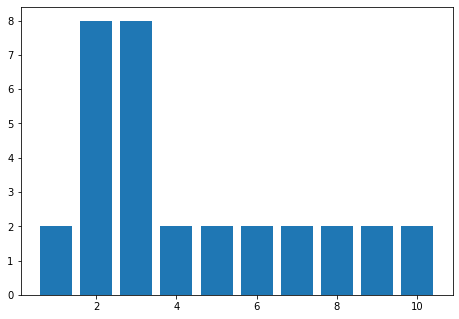

Experiment: N = 2
Starting sort number 1
6.0
Starting sort number 2
2.0
Starting sort number 3
5.0
Starting sort number 4
5.0
Starting sort number 5
3.0
Starting sort number 6
5.0
Starting sort number 7
2.0
Starting sort number 8
2.0
Starting sort number 9
5.0
Starting sort number 10
9.5
[6.  2.  5.  5.  3.  5.  2.  2.  5.  9.5]


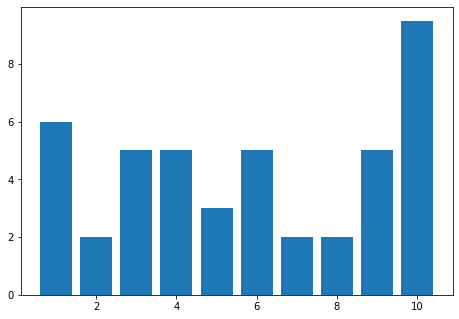

Experiment: N = 10
Starting sort number 1
3.5
Starting sort number 2
5.6
Starting sort number 3
4.6
Starting sort number 4
3.8
Starting sort number 5
5.6
Starting sort number 6
7.4
Starting sort number 7
7.4
Starting sort number 8
6.2
Starting sort number 9
5.0
Starting sort number 10
4.9
[3.5 5.6 4.6 3.8 5.6 7.4 7.4 6.2 5.  4.9]


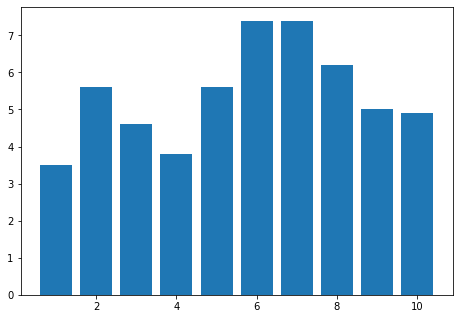

Experiment: N = 20
Starting sort number 1
5.3
Starting sort number 2
5.35
Starting sort number 3
6.5
Starting sort number 4
6.2
Starting sort number 5
5.25
Starting sort number 6
4.95
Starting sort number 7
4.5
Starting sort number 8
6.75
Starting sort number 9
6.4
Starting sort number 10
5.7
[5.3  5.35 6.5  6.2  5.25 4.95 4.5  6.75 6.4  5.7 ]


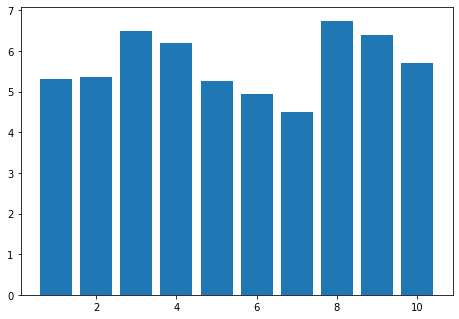

Experiment: N = 50
Starting sort number 1
5.44
Starting sort number 2
5.24
Starting sort number 3
5.84
Starting sort number 4
5.88
Starting sort number 5
5.26
Starting sort number 6
5.62
Starting sort number 7
5.22
Starting sort number 8
5.28
Starting sort number 9
4.74
Starting sort number 10
5.04
[5.44 5.24 5.84 5.88 5.26 5.62 5.22 5.28 4.74 5.04]


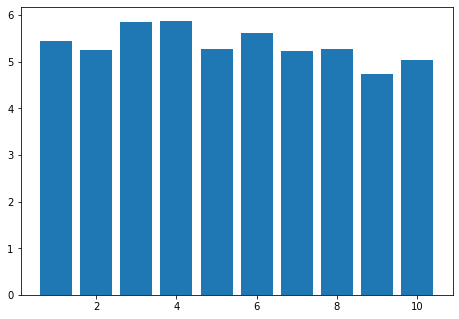

Experiment: N = 100
Starting sort number 1
5.59
Starting sort number 2
5.46
Starting sort number 3
4.86
Starting sort number 4
5.92
Starting sort number 5
5.2
Starting sort number 6
5.26
Starting sort number 7
5.72
Starting sort number 8
5.83
Starting sort number 9
5.05
Starting sort number 10
5.33
[5.59 5.46 4.86 5.92 5.2  5.26 5.72 5.83 5.05 5.33]


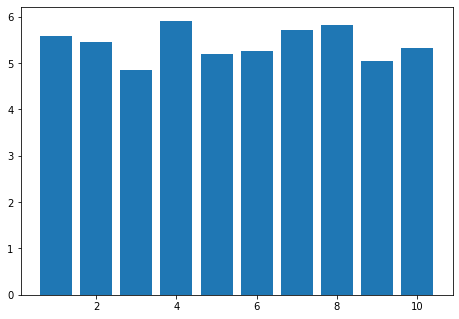

Experiment: N = 200
Starting sort number 1
5.15
Starting sort number 2
5.15
Starting sort number 3
5.555
Starting sort number 4
4.895
Starting sort number 5
5.4
Starting sort number 6
5.215
Starting sort number 7
5.19
Starting sort number 8
5.355
Starting sort number 9
4.99
Starting sort number 10
5.28
[5.15  5.15  5.555 4.895 5.4   5.215 5.19  5.355 4.99  5.28 ]


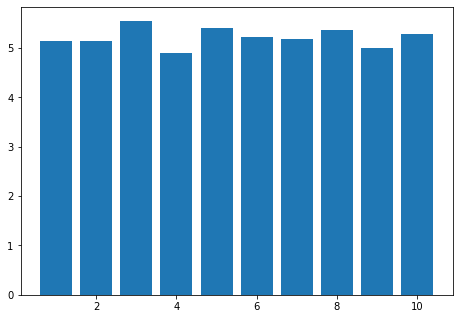

Experiment: N = 500
Starting sort number 1
5.158
Starting sort number 2
5.202
Starting sort number 3
5.168
Starting sort number 4
5.26
Starting sort number 5
5.34
Starting sort number 6
5.214
Starting sort number 7
5.226
Starting sort number 8
5.296
Starting sort number 9
5.582
Starting sort number 10
5.184
[5.158 5.202 5.168 5.26  5.34  5.214 5.226 5.296 5.582 5.184]


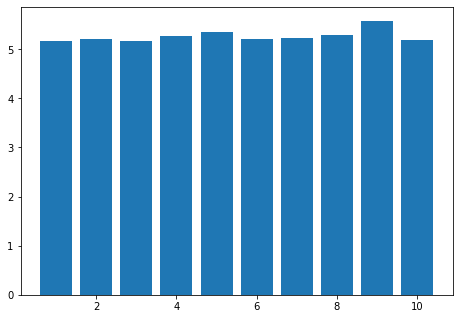

Experiment: N = 1000
Starting sort number 1
5.032
Starting sort number 2
5.306
Starting sort number 3
5.178
Starting sort number 4
5.369
Starting sort number 5
5.16
Starting sort number 6
5.058
Starting sort number 7
5.247
Starting sort number 8
5.411
Starting sort number 9
5.233
Starting sort number 10
5.253
[5.032 5.306 5.178 5.369 5.16  5.058 5.247 5.411 5.233 5.253]


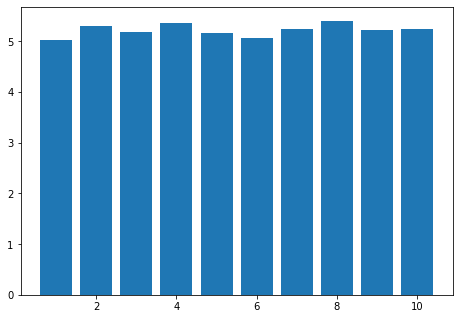

Experiment: N = 2000
Starting sort number 1
5.2835
Starting sort number 2
5.2385
Starting sort number 3
5.2775
Starting sort number 4
5.2495
Starting sort number 5
5.101
Starting sort number 6
5.243
Starting sort number 7
5.3745
Starting sort number 8
5.2005
Starting sort number 9
5.2795
Starting sort number 10
5.2475
[5.2835 5.2385 5.2775 5.2495 5.101  5.243  5.3745 5.2005 5.2795 5.2475]


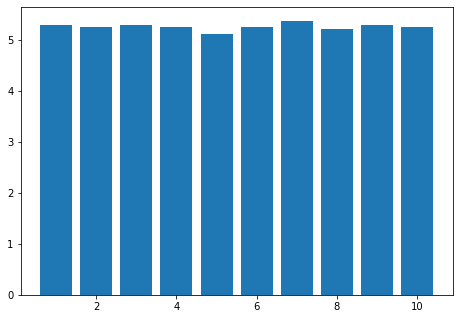

Experiment: N = 5000
Starting sort number 1
5.3184
Starting sort number 2
5.332
Starting sort number 3
5.229
Starting sort number 4
5.2164
Starting sort number 5
5.1772
Starting sort number 6
5.2138
Starting sort number 7
5.2046
Starting sort number 8
5.1794
Starting sort number 9
5.1794
Starting sort number 10
5.2464
[5.3184 5.332  5.229  5.2164 5.1772 5.2138 5.2046 5.1794 5.1794 5.2464]


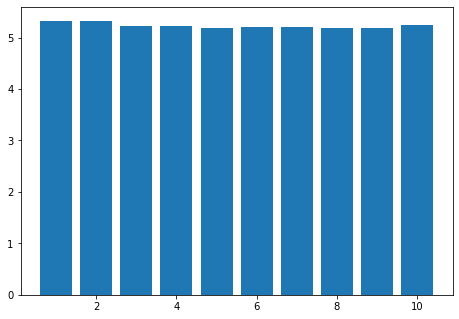

Experiment: N = 10000
Starting sort number 1
5.3277
Starting sort number 2
5.2545
Starting sort number 3
5.2413
Starting sort number 4
5.2775
Starting sort number 5
5.2875
Starting sort number 6
5.2658
Starting sort number 7
5.256
Starting sort number 8
5.2406
Starting sort number 9
5.2049
Starting sort number 10
5.2383
[5.3277 5.2545 5.2413 5.2775 5.2875 5.2658 5.256  5.2406 5.2049 5.2383]


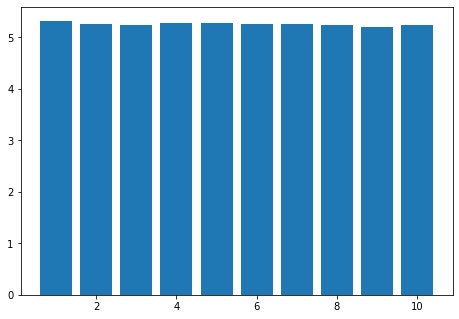

Experiment: N = 20000
Starting sort number 1
5.21435
Starting sort number 2
5.27295
Starting sort number 3
5.2431
Starting sort number 4
5.2599
Starting sort number 5
5.23825
Starting sort number 6
5.24505
Starting sort number 7
5.2423
Starting sort number 8
5.24795
Starting sort number 9
5.2506
Starting sort number 10
5.23595
[5.21435 5.27295 5.2431  5.2599  5.23825 5.24505 5.2423  5.24795 5.2506
 5.23595]


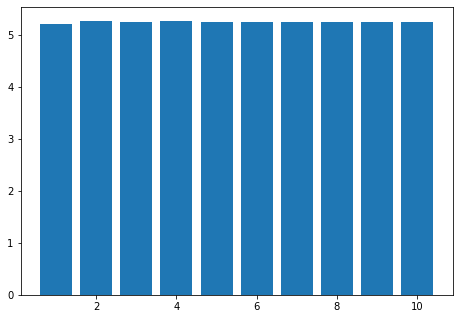

In [24]:
for N in [1, 2, 10, 20, 50, 100, 200, 500, 1000, 2000, 5000, 10000, 20000]:
    print("Experiment: N = "+str(N))
    sort_number = 0
    sorts_data = np.zeros(10)
    for top_sort in top_sorts:
        sort_number += 1
        print("Starting sort number "+str(sort_number))
        sort_to_check = list(top_sort)
        res = np.zeros(N)
        for j in range(0, N):
            simulate_execution_evol(DG, sort_to_check, False) 
            res[j] = count_execution_coverage(DG)
        #print(res)
        print(sum(res)/N)
        sorts_data[sort_number-1] = sum(res)/N
        if (sort_number >= 10):
            break

    print(sorts_data)
    fig = plt.figure()
    file_name="results/mean_execution_coverage_for_"+str(N)+"_attempts.txt"
    np.savetxt(file_name, sorts_data, fmt='%f')
    ax = fig.add_axes([0,0,1,1])
    sorts_names = range(1,11)
    ax.bar(sorts_names,sorts_data)
    plt.show()

finish
0
0.5
5
0.5
1
0.09999999999999998
6
0.09999999999999998
2
1
4
0.5
9
1
3
0.5
7
0.5
8
0.5
10
0.04999999999999999
[0.5, 0.5, 0.09999999999999998, 0.09999999999999998, 1, 0.5, 1, 0.5, 0.5, 0.5, 0.04999999999999999]


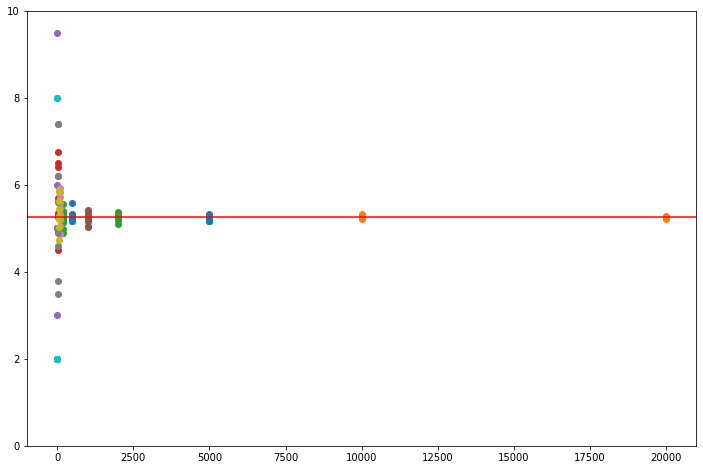

In [28]:
fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(111)
plt.ylim(0, 10)

#get number of data files
files_amount = 0
for file_name in glob.iglob('results/mean_execution_coverage_for_*.txt', recursive=True):
    files_amount += 1

lines_data_x = np.empty(files_amount)
lines_data_y_array = np.empty((10, files_amount))
i = 0
stat_x = []
stat_y = []
for file_name in glob.iglob('results/mean_execution_coverage_for_*.txt', recursive=True):
    N = [int(s) for s in file_name.split('_') if s.isdigit()]
    a = np.empty(10)
    a.fill(N[0])
    stat_x.append(N[0])
    lines_data_x[i] = N[0]
    data = np.loadtxt(file_name, dtype=float)
    for top_sort_num in range(0, 10):
        lines_data_y_array[top_sort_num][i] = data[top_sort_num]
   # print(data)
    ax1.scatter(a, data)
    stat_y.append(st.stdev(data))
    i += 1
    
ax1.axhline(y=analytical_success_coverage2(DG), color='r', linestyle='-')
plt.show()

(0.0, 0.15)

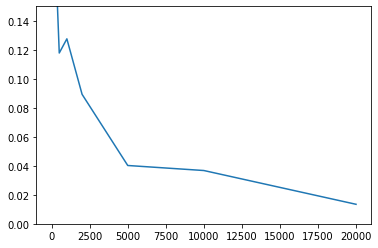

In [12]:
new_x, new_y = zip(*sorted(zip(stat_x, stat_y)))
plt.plot(new_x, new_y)
plt.ylim(0,0.15)

finish
0
0.5
5
0.5
1
0.09999999999999998
6
0.09999999999999998
2
1
4
0.5
9
1
3
0.5
7
0.5
8
0.5
10
0.04999999999999999
[0.5, 0.5, 0.09999999999999998, 0.09999999999999998, 1, 0.5, 1, 0.5, 0.5, 0.5, 0.04999999999999999]


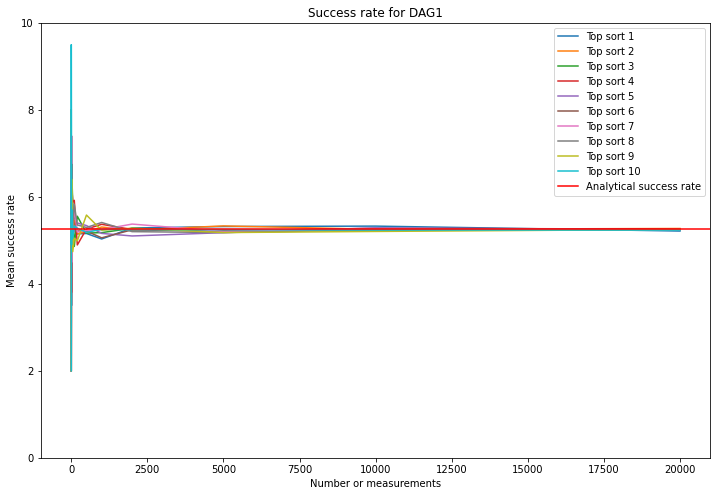

In [36]:

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)
ax.set_title('Success rate for DAG1')
ax.set_xlabel('Number or measurements')
ax.set_ylabel('Mean success rate')
plt.ylim(0, 10)

for top_sort_num in range(0, 10):
    new_x, new_y = zip(*sorted(zip(lines_data_x, lines_data_y_array[top_sort_num,])))
    ax.plot(new_x, new_y, label='Top sort '+str(top_sort_num+1))
ax.axhline(y=analytical_success_coverage2(DG), color='r', linestyle='-', label='Analytical success rate')
ax.legend()
